<a href="https://colab.research.google.com/github/jessika2018/Data-analysis-Master---ashrafieh-sales/blob/main/Networkx_Two_techniques_To_do_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Market Basket Analysis using assocition rules - apriori technique in Two ways**

Association rules analysis is a technique to uncover how items are associated to each other. There are three common ways to measure association.

Measure 1: Support. This says how popular an itemset is, it is number of times appear in total number of transaction. in other word we say frequency of item.

Measure 2: Confidence. This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.

Measure 3: Lift. it is ratio of expected confidance to observed confidance. it is described as confidance of Y when item X was already known(x/y) to the confidance of Y when X item is unknown. in other words confidance of Y w.r.t. x and confiadnce of Y without X (means both are independent to each other).

support = occurance of item / total no of transaction.

confidance = support ( X Union Y) / support(X).

lift = support (X Union Y)/ support(X) * support(Y) .

For more info report this link

In [ ]:
!pip install apyori

In [ ]:
#import all required packages..
import pandas as pd
import numpy as np
from apyori import apriori

In [ ]:
#loading market basket dataset..

df = pd.read_excel('/content/dataset_sunday.xlsx',header=None)

In [ ]:
df.head()

In [ ]:
#we select a sample of data bcz it is very large we use loc function
training_dataSet = df.loc[10:1000]

In [ ]:
training_dataSet.shape

In [ ]:
#replacing empty value with 0.
training_dataSet.fillna(0,inplace=True)

In [ ]:
training_dataSet.head()

In [ ]:
#for using aprori need to convert data in list format..
# transaction = [['apple','almonds'],['apple'],['banana','apple']]....
#shape(991,14)
transactions = []
for i in range(0,len(training_dataSet)):
    transactions.append([str(training_dataSet.values[i,j]) for j in range(0,14) if str(df.values[i,j])!='0'])

In [ ]:
transactions[0]

In [ ]:
#Call apriori function which requires minimum support, confidance and lift, min length is combination of item default is 2".
rules = apriori(transactions,min_support=0.003,min_confidance=0.2,min_lift=3,min_length=2)

In [ ]:
#it generates a set of rules in a generator file...
rules

In [ ]:
# all rules need to be converted in a list..
results = list(rules)
results

In [ ]:
#convert result in a dataframe for further operation...
df_results = pd.DataFrame(results)

In [ ]:
# as we see order statistics itself a list so need to be converted in proper format..
df_results.head()

In [ ]:
#keep support in a separate data frame so we can use later.. 
support = df_results.support

In [ ]:
'''
convert orderstatistic in a proper format.
order statistic has lhs => rhs as well rhs => lhs we can choose any one for convience i choose first one which is 'df_results['ordered_statistics'][i][0]'
''' 

#all four empty list which will contain lhs, rhs, confidance and lift respectively.

first_values = []
second_values = []
third_values = []
fourth_value = []

# loop number of rows time and append 1 by 1 value in a separate list.. first and second element was frozenset which need to be converted in list..
for i in range(df_results.shape[0]):
    single_list = df_results['ordered_statistics'][i][0]
    first_values.append(list(single_list[0]))
    second_values.append(list(single_list[1]))
    third_values.append(single_list[2])
    fourth_value.append(single_list[3])

In [ ]:
#convert all four list into dataframe for further operation..
lhs = pd.DataFrame(first_values)
rhs= pd.DataFrame(second_values)
confidance=pd.DataFrame(third_values,columns=['Confidance'])
lift=pd.DataFrame(fourth_value,columns=['lift'])

In [ ]:
#concat all list together in a single dataframe
df_final = pd.concat([lhs,rhs,support,confidance,lift], axis=1)
df_final

In [ ]:
'''
 we have some of place only 1 item in lhs and some place 3 or more so we need to a proper represenation for User to understand. 
 removing none with ' ' extra so when we combine three column in 1 then only 1 item will be there with spaces which is proper rather than none.
 example : coffee,none,none which converted to coffee, ,
'''
df_final.fillna(value=' ', inplace=True)

In [ ]:
#set column name
df_final.columns = ['lhs',1,2,'rhs','support','confidance','lift']

In [ ]:
#add all three column because those where the lhs itemset only
df_final['lhs'] = df_final['lhs']+str(", ")+df_final[1]+str(", ")+df_final[2]

In [ ]:
#drop those 1,2 column because now we already appended to lhs column..
df_final.drop(columns=[1,2],inplace=True)

In [ ]:
#this is final output.. you can sort based on the support lift and confidance..
df_final.head()

# **Other way of doing Apriori in Python.**

Why we doing it in this way -

Limitation of first approach was need to converted data in a list fomat. when we see real life a store has many thousands of sku in that case it is computationally expensive.
Apyori package is outdated. i mean there is no recent update from past few years.
Results are coming in improper format which need to represent properly and that need computational operation to perform.
mlxtend used two way based approach which generate frequent itemset and association rules over that. -check here for more info
mlxtend are proper and has community support

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=bc5b61795a3b73cf88678c8ac3e2c037c6a2ab68113f116ea6b50adfb4597dba
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
#import all required packages..
import pandas as pd
import numpy as np
from apyori import apriori

In [ ]:
'''
load apriori and association package from mlxtend. 
Used different dataset because mlxtend need data in below format. 

             itemname  apple banana grapes
transaction  1            0    1     1
             2            1    0     1  
             3            1    0     0
             4            0    1     0
             
 we could have used above data as well but need to perform operation to bring in this format instead of that used seperate data only.            
'''


from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df1 = pd.read_excel('/content/dataset_sunday.xlsx')
df1.head()

,Year,Month,Store_Name,Receipt_Number,Category,Group,Sub_Group,Item_Number,Item_Family,Item_Description,Product_Size,Price_LL,Quantity,Sales_Value_Dollars
0,2021,Jul,Ashrafieh,000000PD02000660322,MEAL SOLUTIONS,HOT BEVERAGES,FLAVORED INSTANT COFFEE,264164,NESCAFE,NESCAFE 3IN1 CLASSIC BAG,30*20G,250.0,2.0,0.331675
1,2021,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,BISCUITS,WAFERS,104874,GANDOUR,GANDOUR UNICA,27G,250.0,1.0,0.165837
2,2021,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,MINI CAKES,135173,ENG.CAKE,CAKE PLAIN,65G,595.0,1.0,0.394693
3,2021,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,CROISSANT,479487,KARUZO,CROISSANT CHESSECAKE,62G,750.0,1.0,0.497512
4,2021,Jul,Ashrafieh,000000PD02000660322,TOBACCO,CIGARETTES,FULL STRENGTH,488316,WINSTON,BLUE COMPACT BOX SHORT,1PC,1999.0,1.0,1.326036


In [ ]:
# data has many country choose any one for check..
df1.Store_Name.value_counts().head(5)

Ashrafieh    113790
Jbeil         68336
Dbayeh        50185
Hazmieh       46234
Name: Store_Name, dtype: int64

In [ ]:
#using only France country data for now can check for other as well..
df1 = df1[df1.Store_Name == 'Ashrafieh']

In [ ]:
# some spaces are there in description need to remove else later operation it will create problem..
df1['Item_Description'] = df1['Item_Description'].str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#some of transaction quantity is negative which can not be possible remove that.
df1 = df1[df1.Quantity >0]

In [ ]:
df1[df1.Store_Name == 'Ashrafieh'].head(10)

,Year,Month,Store_Name,Receipt_Number,Category,Group,Sub_Group,Item_Number,Item_Family,Item_Description,Product_Size,Price_LL,Quantity,Sales_Value_Dollars
0,2021,Jul,Ashrafieh,000000PD02000660322,MEAL SOLUTIONS,HOT BEVERAGES,FLAVORED INSTANT COFFEE,264164,NESCAFE,NESCAFE 3IN1 CLASSIC BAG,30*20G,250.0,2.0,0.331675
1,2021,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,BISCUITS,WAFERS,104874,GANDOUR,GANDOUR UNICA,27G,250.0,1.0,0.165837
2,2021,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,MINI CAKES,135173,ENG.CAKE,CAKE PLAIN,65G,595.0,1.0,0.394693
3,2021,Jul,Ashrafieh,000000PD02000660322,BEVERAGES & READY TO EAT,CAKES,CROISSANT,479487,KARUZO,CROISSANT CHESSECAKE,62G,750.0,1.0,0.497512
4,2021,Jul,Ashrafieh,000000PD02000660322,TOBACCO,CIGARETTES,FULL STRENGTH,488316,WINSTON,BLUE COMPACT BOX SHORT,1PC,1999.0,1.0,1.326036
5,2021,Jul,Ashrafieh,000000PD02000660323,MEAL SOLUTIONS,HOT BEVERAGES,COFFEE,123764,CAFÉ NAJAR,COFFEE GOURMET VAC,250G,5250.0,1.0,3.482587
6,2021,Jul,Ashrafieh,000000PD02000660323,MEAL SOLUTIONS,SPREADS,TAHINA,147320,EL YAMAN,TAHINEH,454G,4999.0,2.0,6.632172
7,2021,Jul,Ashrafieh,000000PD02000660323,CLEANING,ALUMINUM FOIL & CLING,ALUMINUM FOIL,266717,SANITA,CLASSIC ALUMINUM,25SQ,2750.0,1.0,1.824212
8,2021,Jul,Ashrafieh,000000PD02000660323,CHILLED,BUTTER+OTHERS,BUTTER,358539,LURPAK,DANISH BUTTER -10%,200G,3250.0,2.0,4.311774
9,2021,Jul,Ashrafieh,000000PD02000660323,CHILLED,LOCAL/Import BREAD,BROWN BREAD,393636,M/D'OR,PIN ARABE BLE COMPLET SANS SEL,525G,2000.0,1.0,1.326700


In [ ]:
#convert data in format which it require converting using pivot table and Quantity sum as values. fill 0 if any nan values

basket = pd.pivot_table(data=df1,index='Receipt_Number',columns='Item_Description',values='Quantity', \
                        aggfunc='sum',fill_value=0)

In [ ]:
basket.head()

Item_Description,1% CHOCOLATE MILK RTD ASP,1/4 FIL.MAQRX TOMAT/BAS,10 BATONNETS 5VANILLE 5 FRAISE,10 CAPS CARAMEL,10 CAPS ESPRESSO BRESIL,10 CAPS ESPRESSO COLOMBIE,10 CAPS ESPRESSO ETHIOPIE,10 CAPS ESPRESSO LUNGO INTENSE,10 CAPS ESPRESSO PEROU,10 CAPS ESPRESSO RISTRETTO,10 CAPS NOISETTE,10 FISH FINGERS,10 GLACES STICK,10*CHICKEN IN GRAVY +2FREE VP,100% NATURAL TOMATO PASTE,114 BAIN DOUCHE FRAICHEUR EPIC,114 SG KIDS BUBBLE GUM,114 SG KIDS FUNNY SPLASH,114 SG KIDS HAPPY SHOWER,114 SHOWER GEL ABSOLUTE DESIRE,114 SHOWER GEL CREAM LUXURY,114 SHOWER GEL DARK BLACK,114 SHOWER GEL FLOWER CARESS,114 SHOWER GEL HONEY MILK,114 SHOWER GEL MEN ADVENTURE,114 SHOWER GEL MEN NIGHT,114 SHOWER GEL MEN SPORT,114 SHOWER GEL OCEAN WAVE,114 SHOWER GEL OECHID MILK,114 SHOWER GEL ORIENTAL SARAB,114 SHOWER GEL ORIENTAL VELVET,114 SHOWER GEL VANILLA COCO,114 SHOWER GEL VANILLA MILK,114 SHOWER GEL WOOD PASSION,12 MINI CORN ON THE COB,12*SNICKERS @ SP PRICE,12*TACO SHELLS,12*TUTTI FRUTTI BAGS,12*UNICA MINIS BAGS DARK,14*OREO CHOCO CREAM+2FREE,...,YAOURT BOIR FRAIS DOODINGUE,YAOURT GRECQUE BREBIS BIO,YAOURT MANGUE ACTIVIA,YAOURT NATURE CHEVRE BIO,YELLOW EXTRA STONG,YELLOW LABEL LONG LEAF,YELLOW LABEL MINT,YELLOW MUSTARD MILD 220ML,YELLOW POP CORN POLYBAG,YELOW LABL L/LEAF 400G+120G FR,YERBA MATE,YOGGO A BOIRE CHOCOLAT,YOGHURT PLAIN,YOGURT 2%,YOGURT COATED ALMOND+APRICOT,YOGURT PLAIN LIGHT,YOGURT-0%FAT FRT SALAD,YOP GREEK 100 CAL MIXED STRAWB,YOP GREEK 100 CAL PEACH,ZAATAR WITH NUTS,ZEBRA CURVE FILE,ZERO CALORIE SWEETNER,ZERO FAT MILK POWDER,ZESTY LEMON CAKE MIX,ZHOURAT MIX,ZIP BAG FLOUR ALL PURPOSE,ZIPPER BAG MEDIUM,ZIPPER BAGS SMALL,ZIPPER SANDWICH BAGS,ZONIN CHRDNY VNO VARITLE WHT16,ZONIN PNT GRGIO DEL VNZIE WH16,ZONIN PROSECCO 1821 SPARKLING,ZONIN SOAVE DOC WHITE 2016,ZUFI MINI BREADSTICKS PAPRIKA,ZUFI MINI BREADSTICKS PIZZA,ZULU DARK CHOCOLATE BREADSTICK,ZULU MILK CHOC RICE STICKS,ZULU MILK CHOCOLATE BREADSTICK,ZWAN CHICKEN LM OLIVE,ZWAN MORTADELLA OLIVE
Receipt_Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000000PD02000660322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000000PD02000660323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000000PD02000660326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000000PD02000660327,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000000PD02000660328,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# we dont need quantity sum we need either has taken or not so if user has taken that item mark as 1 else he has not taken 0.

def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

In [ ]:
basket_sets = basket.applymap(convert_into_binary)

In [ ]:
#call apriori function and pass minimum support here we are passing 7%. means 7 times in total number of transaction that item was present.
frequent_itemsets = apriori(basket_sets, min_support=0.002, use_colnames=True)

In [ ]:
#it will generate frequent itemsets using two step approch
frequent_itemsets

,support,itemsets
0,0.003029,(4*WHITE MEAT TUNA IN WATER 3+1)
1,0.002080,(4*WTE MEAT TUNA IN VEG OIL3+1F)
2,0.003504,(7 UP SSPET)
3,0.006971,(7UP CAN)
4,0.007081,(7UP FREE CAN)
...,...,...
345,0.003175,"(7UP FREE CAN, PEPSI DIET)"
346,0.002263,"(MINERAL WATER PET, BEER BOTTLE)"
347,0.002555,"(MINERAL WATER PET, EGGS RED)"
348,0.002153,"(MINERAL WATER PET, LABNEH BALADI)"


In [ ]:
# we have association rules which need to put on frequent itemset. here we are setting based on lift and has minimum lift as 1
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(7UP CAN),(PEPSI CAN),0.006971,0.013139,0.002664,0.382199,29.088525,0.002573,1.597376
1,(PEPSI CAN),(7UP CAN),0.013139,0.006971,0.002664,0.202778,29.088525,0.002573,1.245611
2,(7UP FREE CAN),(PEPSI DIET),0.007081,0.010073,0.003175,0.448454,44.518770,0.003104,1.794820
3,(PEPSI DIET),(7UP FREE CAN),0.010073,0.007081,0.003175,0.315217,44.518770,0.003104,1.449978
4,(MINERAL WATER PET),(BEER BOTTLE),0.097339,0.018176,0.002263,0.023247,1.279010,0.000494,1.005192


In [ ]:
# rules_mlxtend.rename(columns={'antecedents':'lhs','consequents':'rhs'})

# as based business use case we can sort based on confidance and lift.
rules_mlxtend[ (rules_mlxtend['lift'] >= 1) & (rules_mlxtend['confidence'] >= 0.03) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(7UP CAN),(PEPSI CAN),0.006971,0.013139,0.002664,0.382199,29.088525,0.002573,1.597376
1,(PEPSI CAN),(7UP CAN),0.013139,0.006971,0.002664,0.202778,29.088525,0.002573,1.245611
2,(7UP FREE CAN),(PEPSI DIET),0.007081,0.010073,0.003175,0.448454,44.518770,0.003104,1.794820
3,(PEPSI DIET),(7UP FREE CAN),0.010073,0.007081,0.003175,0.315217,44.518770,0.003104,1.449978
5,(BEER BOTTLE),(MINERAL WATER PET),0.018176,0.097339,0.002263,0.124498,1.279010,0.000494,1.031021
7,(EGGS RED),(MINERAL WATER PET),0.018066,0.097339,0.002555,0.141414,1.452796,0.000796,1.051334
9,(LABNEH BALADI),(MINERAL WATER PET),0.019344,0.097339,0.002153,0.111321,1.143636,0.000270,1.015733
11,(SPARKLING WATER),(MINERAL WATER PET),0.013468,0.097339,0.002007,0.149051,1.531257,0.000696,1.060770


In [ ]:
#plotting output in a graph plot.

import networkx as nx
import matplotlib.pyplot as plt 

In [ ]:
G = nx.barabasi_albert_graph(100,2)

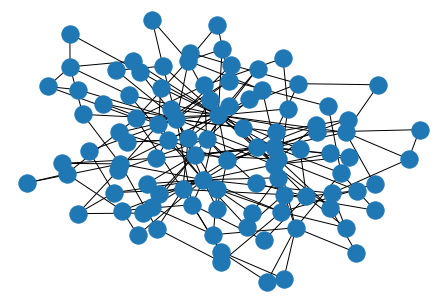

In [ ]:
nx.draw_spring(G)

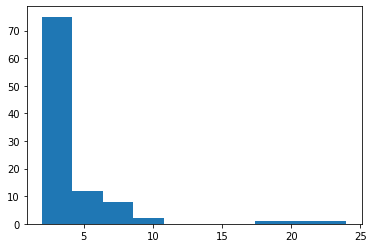

In [ ]:
plt.hist([v for k,v in nx.degree(G)]);

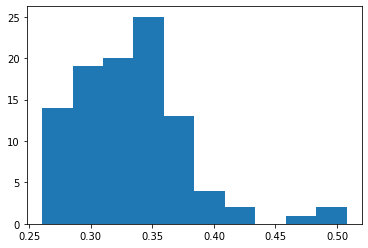

In [ ]:
plt.hist(nx.centrality.closeness_centrality(G).values());

In [ ]:
nx.diameter(G)

6

In [ ]:
nx.cluster.average_clustering(G)

0.08755299480585521

In [ ]:
nodes = list(range(100))

df = pd.DataFrame({'from': np.random.choice(nodes, 100),
                   'to': np.random.choice(nodes,100)
                  })

In [ ]:
df

,from,to
0,0,30
1,62,57
2,77,81
3,66,33
4,58,75
...,...,...
95,57,26
96,53,38
97,3,79
98,40,90


In [ ]:
G = nx.from_pandas_edgelist(df, source='from', target='to')

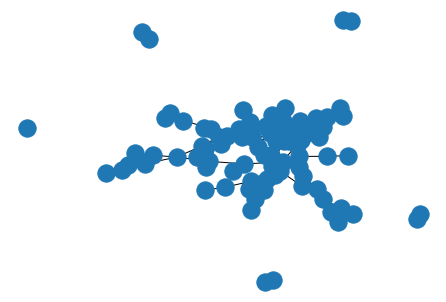

In [ ]:
nx.draw(G);

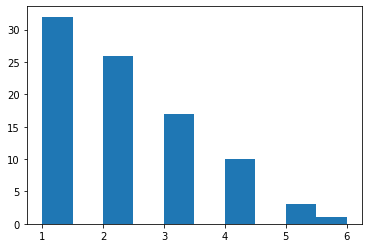

In [ ]:
plt.hist([v for k,v in nx.degree(G)]);